# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [59]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os, os.path

In [60]:
 # write your code here

path = "images"
images = []

for filename in os.listdir(path):
    img = Image.open(os.path.join(path, filename))
    img = np.array(img).flatten()
    img = np.divide(img, 255.0)

    images.append(img)

images = np.array(images)
print(images.shape)

(8, 12288)


### 2. Compute the mean of the images. 

In [61]:
# write your code here

images_mean = np.mean(images, axis=0)
images_mean

array([0.27254902, 0.34509804, 0.22745098, ..., 0.37696078, 0.40735294,
       0.33676471], shape=(12288,))

### 3. Normalize the images by subtracting the mean from each image.

In [62]:
# write your code here

normalized_images = images - images_mean
normalized_images.shape

(8, 12288)

### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [64]:
# write your code here

W = np.load("coefs.npy")
b = np.load("bias.npy")

scores = np.dot(normalized_images, W) + b
# print(scores)
# print(scores.shape)

def softmax(zi):
    exp_zi = np.exp(zi)
    return exp_zi / np.sum(exp_zi, axis=1, keepdims=True)

y_hat = softmax(scores)
# y_hat.shape
y_hat

array([[1.62527156e-58, 1.00000000e+00, 5.11526898e-61, 3.54141615e-77],
       [1.00000000e+00, 1.43609522e-54, 6.08127256e-56, 1.14689882e-49],
       [1.10512058e-85, 3.48890948e-82, 1.85461455e-92, 1.00000000e+00],
       [5.21318772e-44, 1.35101464e-35, 1.00000000e+00, 3.16818876e-30],
       [6.11043342e-33, 1.13796776e-67, 1.00000000e+00, 1.83963515e-58],
       [1.00000000e+00, 2.21244739e-53, 8.81171439e-40, 2.95009117e-18],
       [5.65077270e-62, 1.00000000e+00, 8.33899457e-63, 3.13481098e-67],
       [6.49446016e-29, 5.02208009e-20, 1.00000000e+00, 5.34600951e-18]])

### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [65]:
# write your code here

y = [0, 0, 1, 1, 2, 2, 3, 3]

def accuracy_score(y_truth, y_pred):
    return np.mean(y_truth == y_pred)

yp = np.argmax(y_hat, axis=1)
acc_score = accuracy_score(y, yp)
acc_score

np.float64(0.25)

### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [66]:
# write your code here

labels = {0: "Cat", 1: "Dog", 2: "Frog", 3: "Horse"}

for pred in yp:
    print(labels[pred])

Dog
Cat
Horse
Frog
Frog
Cat
Dog
Frog


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

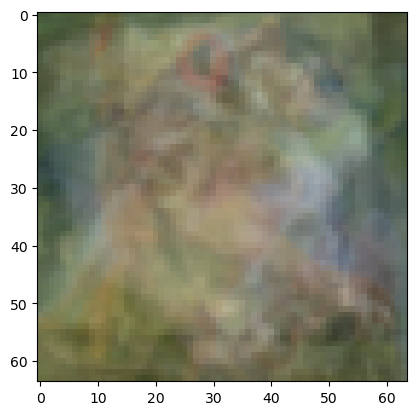

In [67]:
# write your code here

mean_image = images_mean.reshape(64, 64, 3)
mean_image = mean_image * 255

plt.imshow(np.uint8(mean_image))
plt.show()